# Code to show how different corner modes work on extreme geometry

The purpose of this is to show off upgrades the GDSFactory built-in code to allow users to access the different corner modes offered by klayout. This has proved useful to me for fixing DRC minimum space and minimum width issues in real tapeouts where I had geometry that was more effectively cut by the 'octagon_limit' than the 'square_limit' that is the current default (and only option in the main branch as of the writing of this notebook)

Author: Eli Doris, Oct 17 2025

In [1]:
import gdsfactory as gf
from gdsfactory.typings import CornerMode
import numpy as np
import matplotlib.pyplot as plt

NameError: name 'CornerMode' is not defined

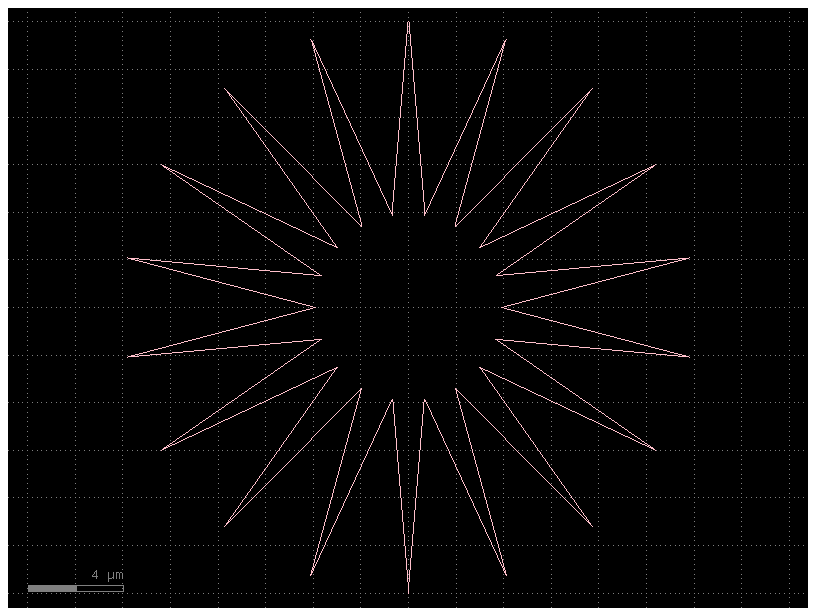

In [2]:
# Start with some extreme geometry that would cause major DRC problems
def extreme_shape():
    c = gf.Component()
    triangle = gf.c.triangle4(x=1,y=12,spacing=0,layer=(64,0))
    angles = np.arange(0,180,180/9)
    for angle in angles:
        t = c << triangle
        t.rotate(angle)
        t.x = 0
        t.y = 0
    c.flatten()
    return c

shape_base = extreme_shape()
shape_base.plot()

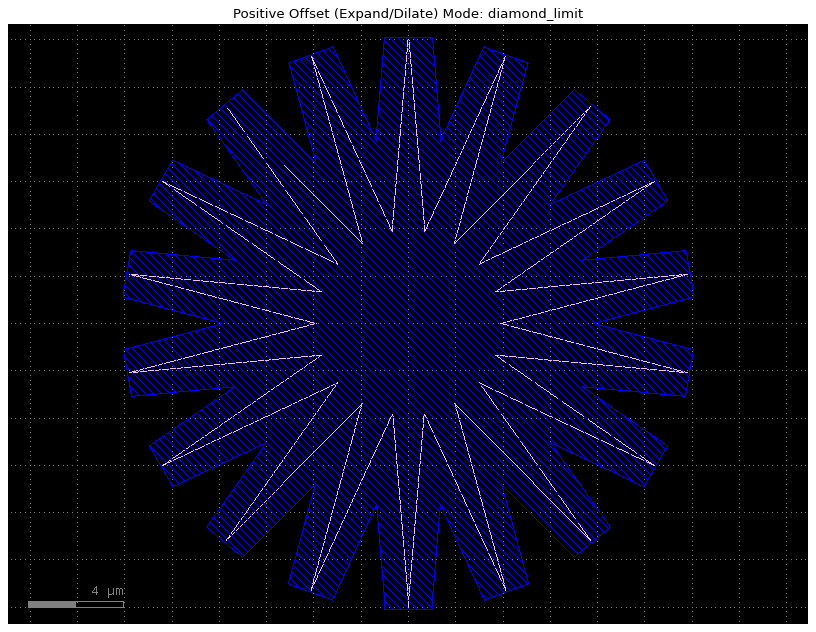

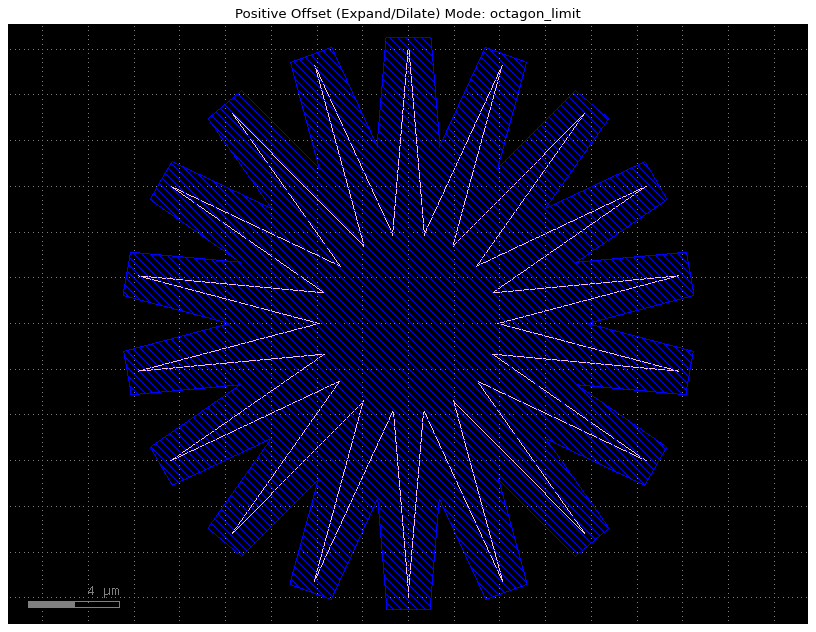

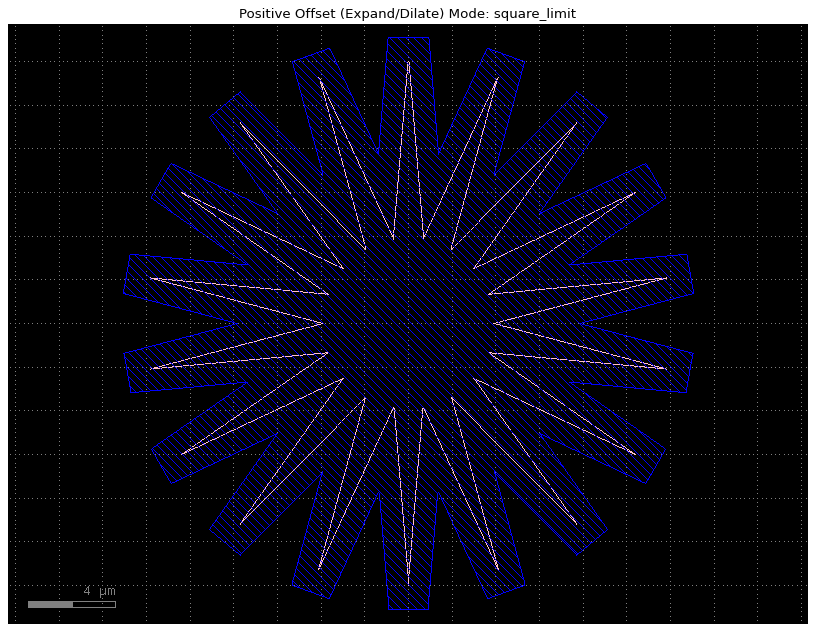

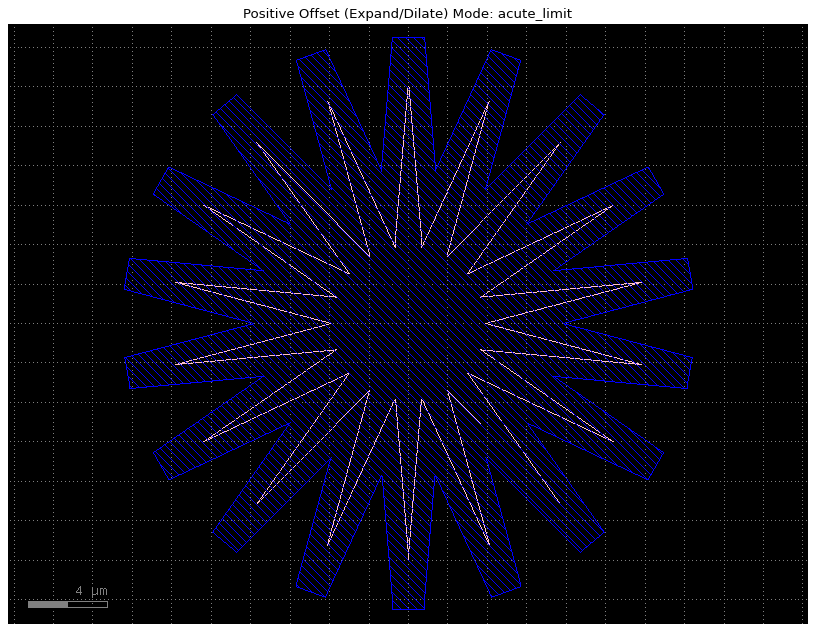

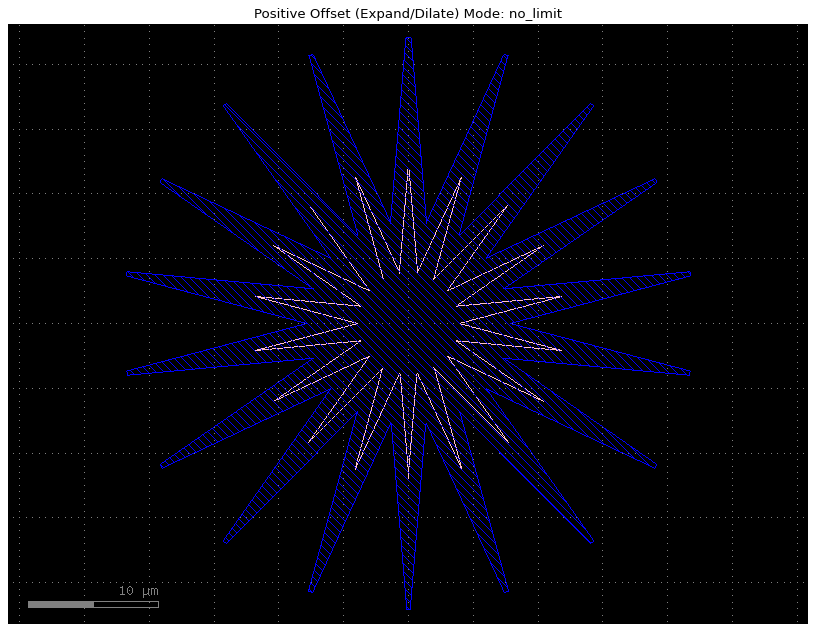

In [3]:
# Show behavior under different modes for positive offset
for mode in CornerMode:
    corner_mode = mode.value
    c = gf.Component()
    shape_base = c << extreme_shape()
    shape_offset = extreme_shape()
    shape_offset.offset(layer=(64,0),distance=1,corner_mode=corner_mode)
    shape_offset.remap_layers({
        (64,0) : (10,0)
    })
    c << shape_offset
    c.plot()
    plt.title('Positive Offset (Expand/Dilate) Mode: ' + mode.name)

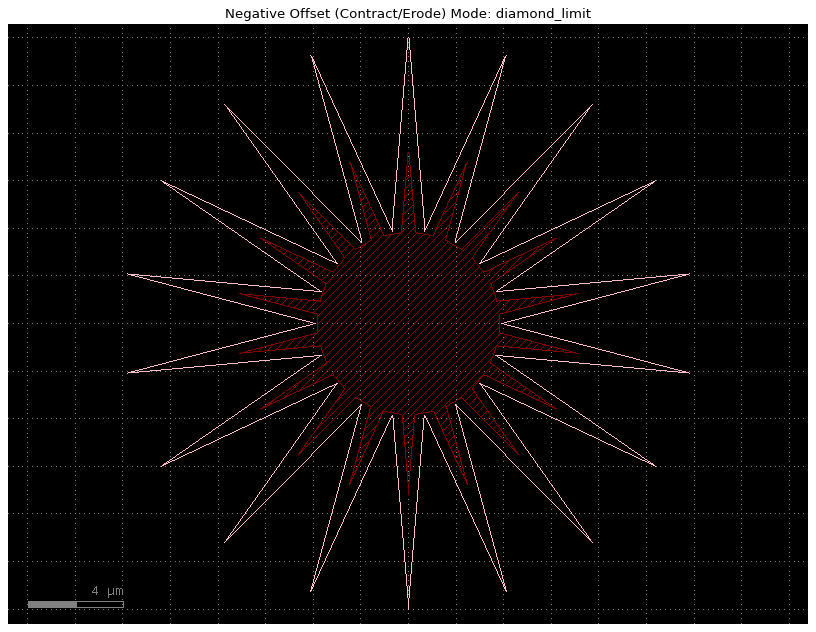

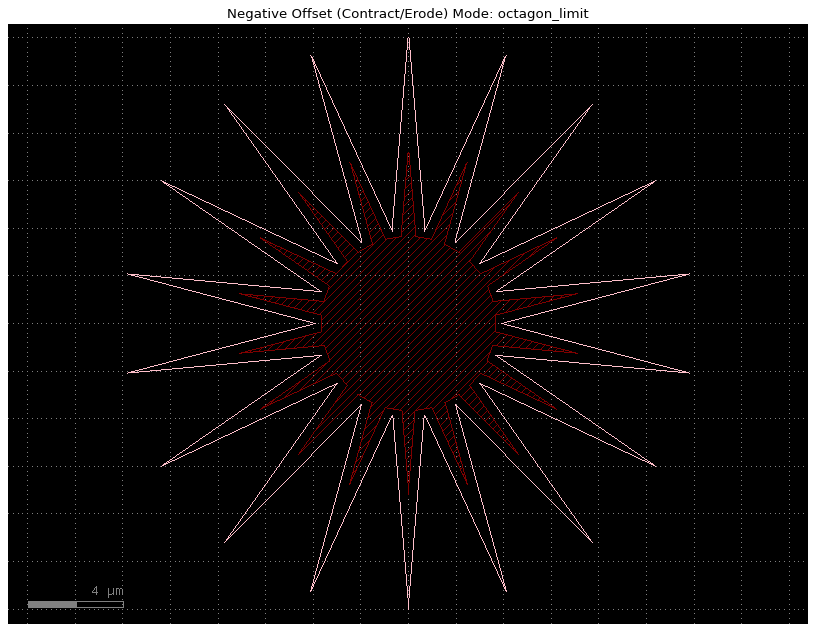

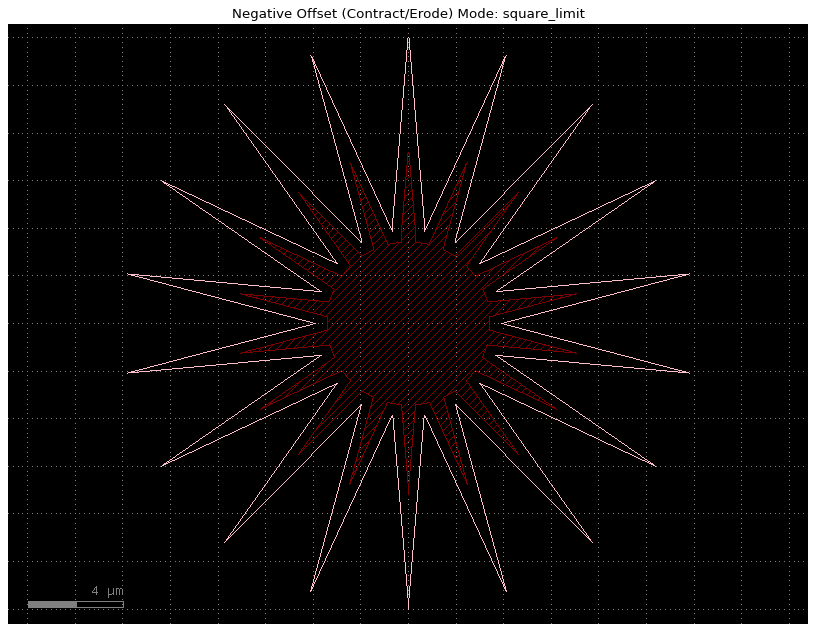

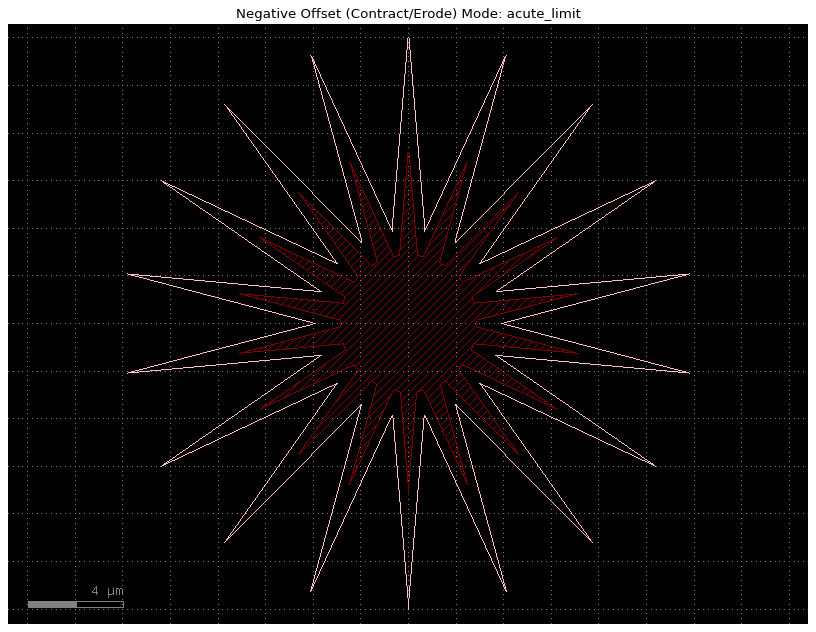

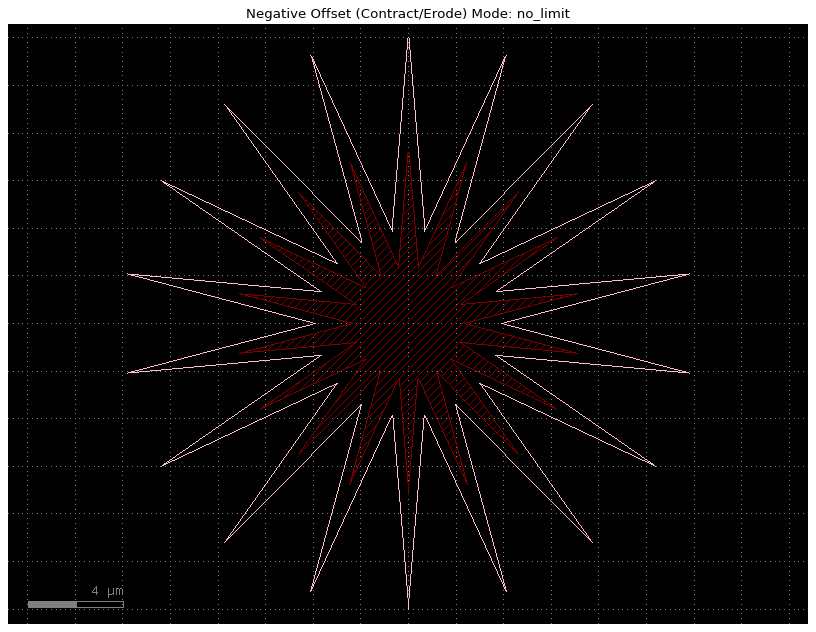

In [4]:
# Show behavior for negative offset 
for mode in CornerMode:
    corner_mode = mode.value
    c = gf.Component()
    shape_base = c << extreme_shape()
    shape_offset = extreme_shape()
    shape_offset.offset(layer=(64,0),distance=-0.4,corner_mode=corner_mode)
    shape_offset.remap_layers({
        (64,0) : (12,0)
    })
    c << shape_offset
    c.plot()
    plt.title('Negative Offset (Contract/Erode) Mode: ' + mode.name)

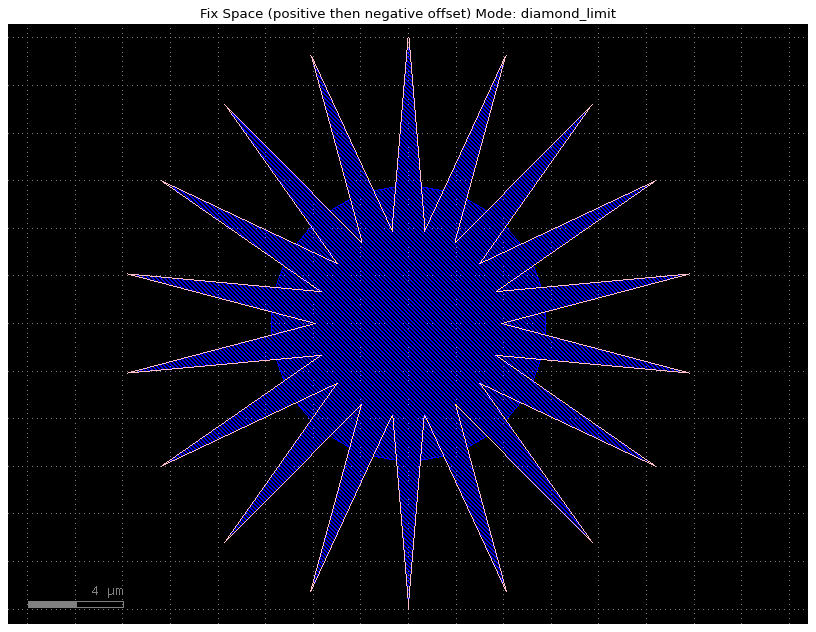

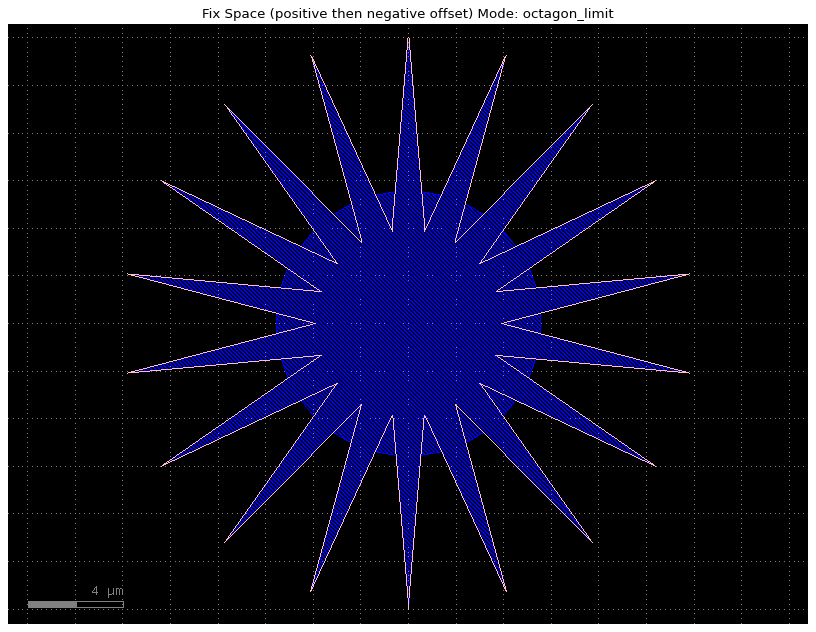

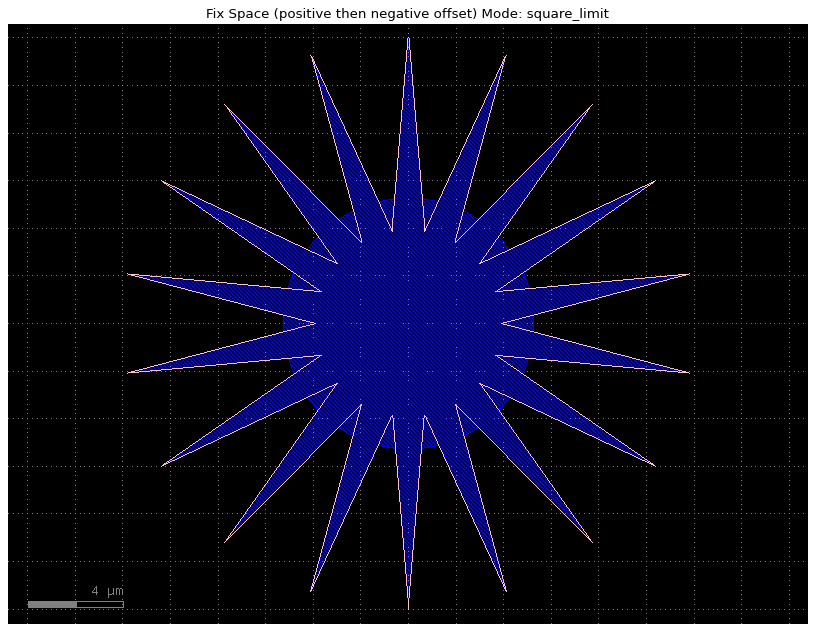

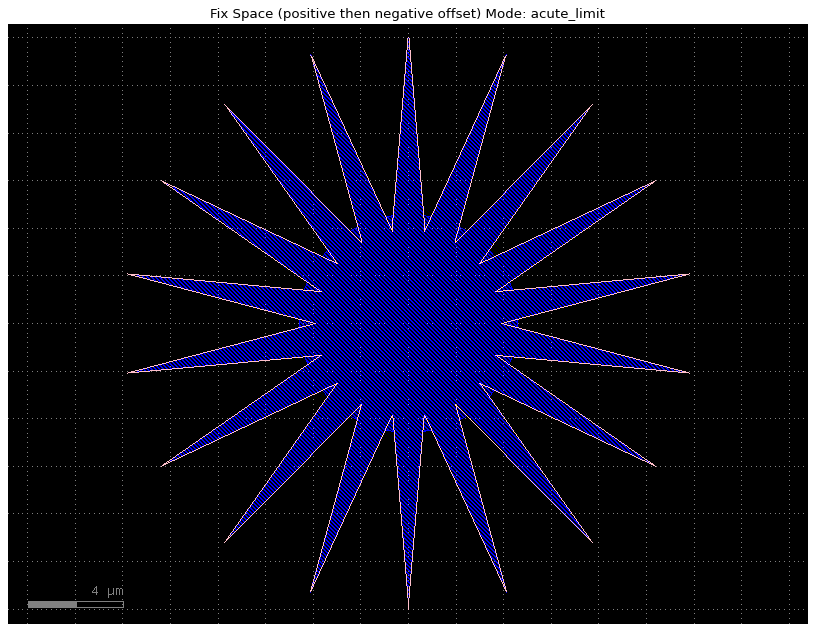

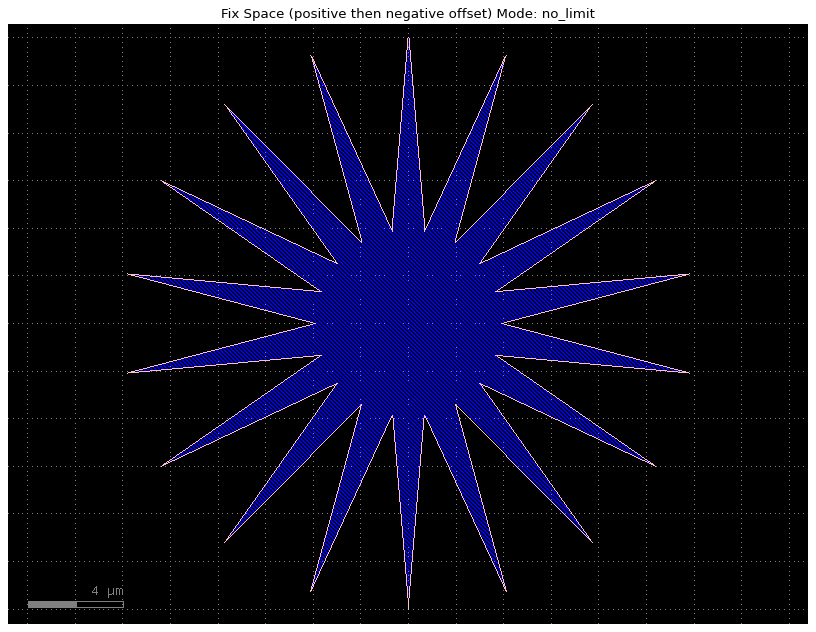

In [5]:
# Show behavior for minimum space fixing mode (positive then negative)
for mode in CornerMode:
    corner_mode = mode.value
    c = gf.Component()
    shape_base = c << extreme_shape()
    shape_offset = extreme_shape()
    shape_offset.offset(layer=(64,0),distance=0.5,corner_mode=corner_mode)
    shape_offset.offset(layer=(64,0),distance=-0.5,corner_mode=corner_mode)
    shape_offset.remap_layers({
        (64,0) : (25,0)
    })
    c << shape_offset
    c.plot()
    plt.title('Fix Space (positive then negative offset) Mode: ' + mode.name)

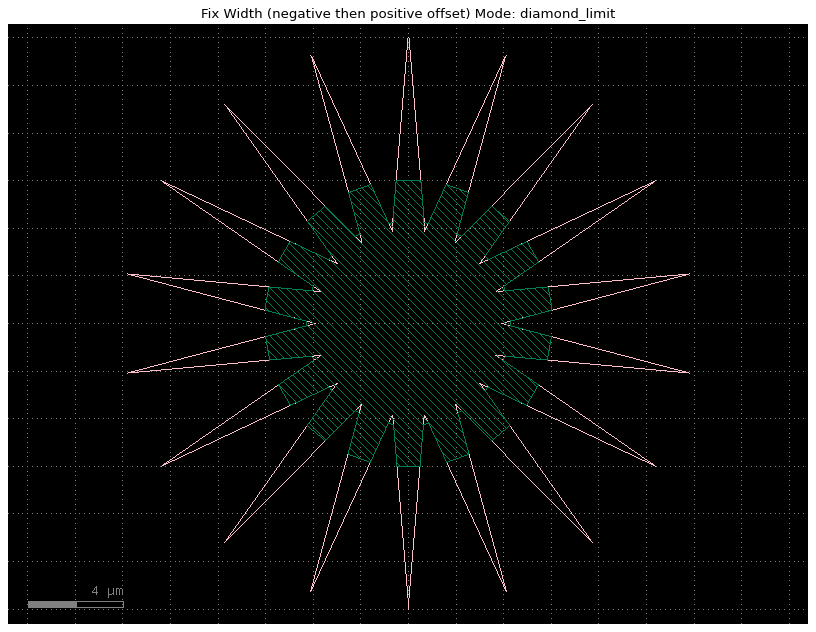

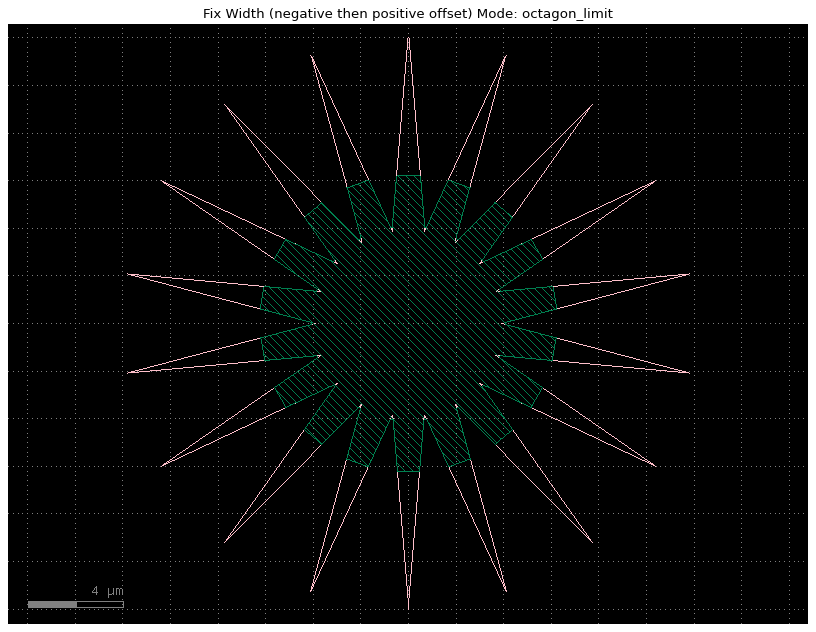

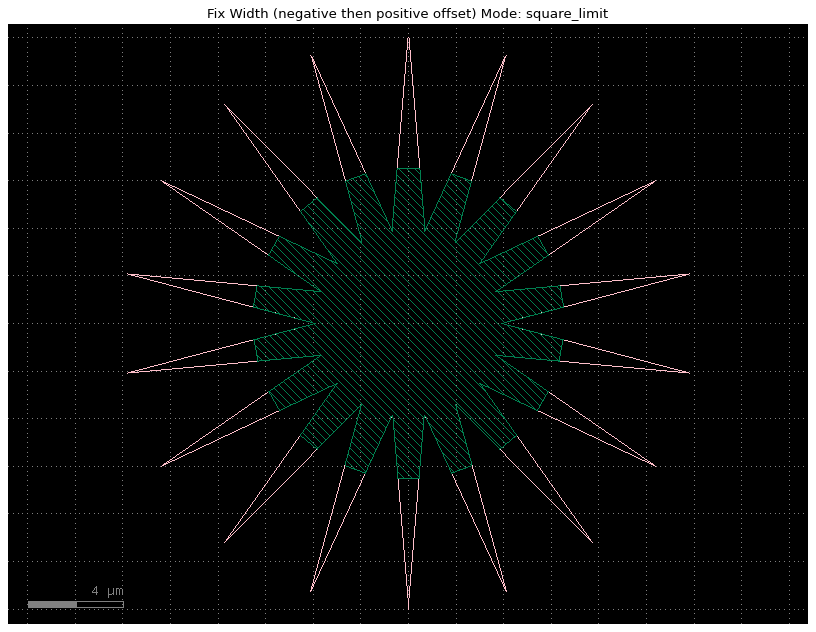

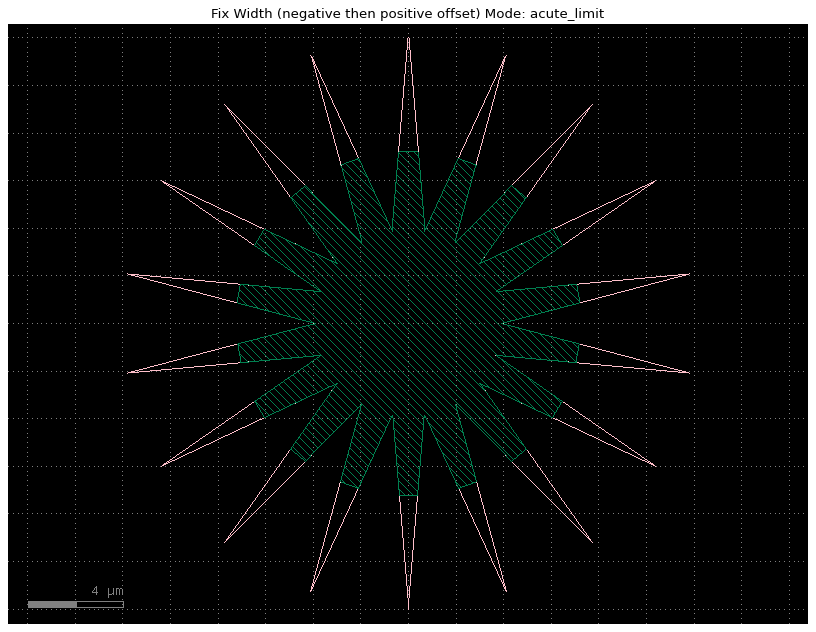

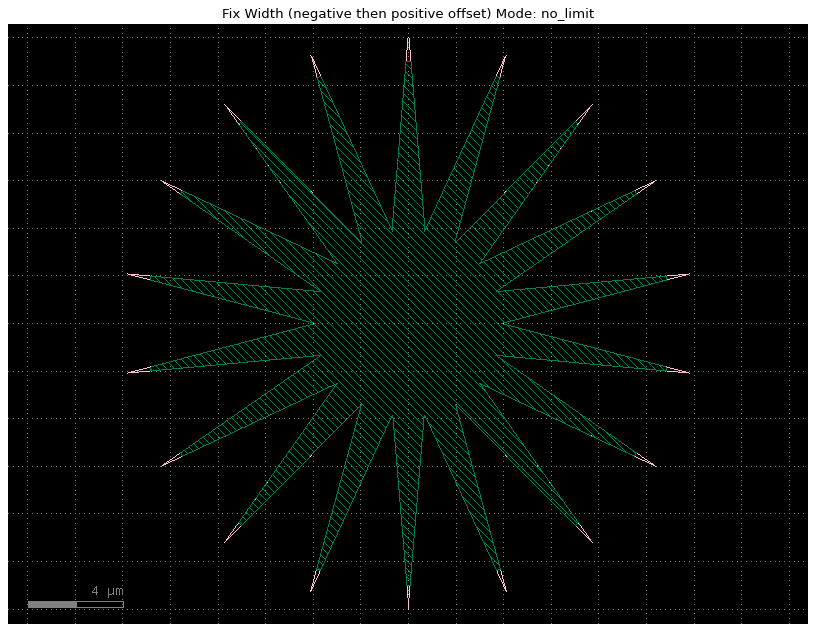

In [6]:
# Show behavior for minimum width fixing mode (negative then positive)
for mode in CornerMode:
    corner_mode = mode.value
    c = gf.Component()
    shape_base = c << extreme_shape()
    shape_offset = extreme_shape()
    shape_offset.offset(layer=(64,0),distance=-0.5,corner_mode=corner_mode)
    shape_offset.offset(layer=(64,0),distance=0.5,corner_mode=corner_mode)
    shape_offset.remap_layers({
        (64,0) : (31,0)
    })
    c << shape_offset
    c.plot()
    plt.title('Fix Width (negative then positive offset) Mode: ' + mode.name)

Text(0.5, 1.0, 'Positive Offset (Expand/Dilate) All Modes')

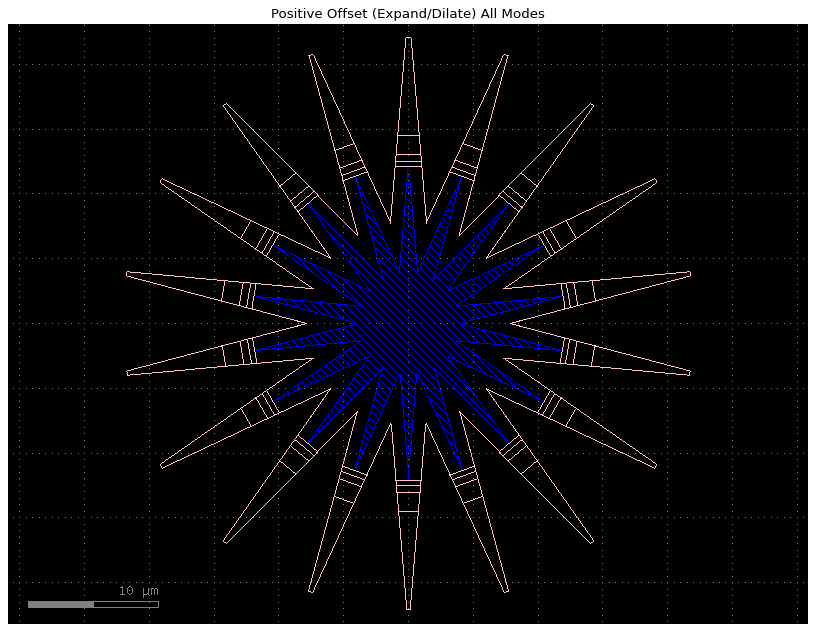

In [7]:
# Plot all modes on top of one another, positive offset
c = gf.Component()
base_shape = extreme_shape()
base_shape.remap_layers({
    (64,0) : (10,0)
})
c << base_shape

for mode in CornerMode:
    corner_mode = mode.value
    shape_offset = extreme_shape()
    shape_offset.offset(layer=(64,0),distance=1,corner_mode=corner_mode)
    c << shape_offset
    
c.plot()
plt.title('Positive Offset (Expand/Dilate) All Modes')

Text(0.5, 1.0, 'Negative Offset (Contract/Erode) All Modes')

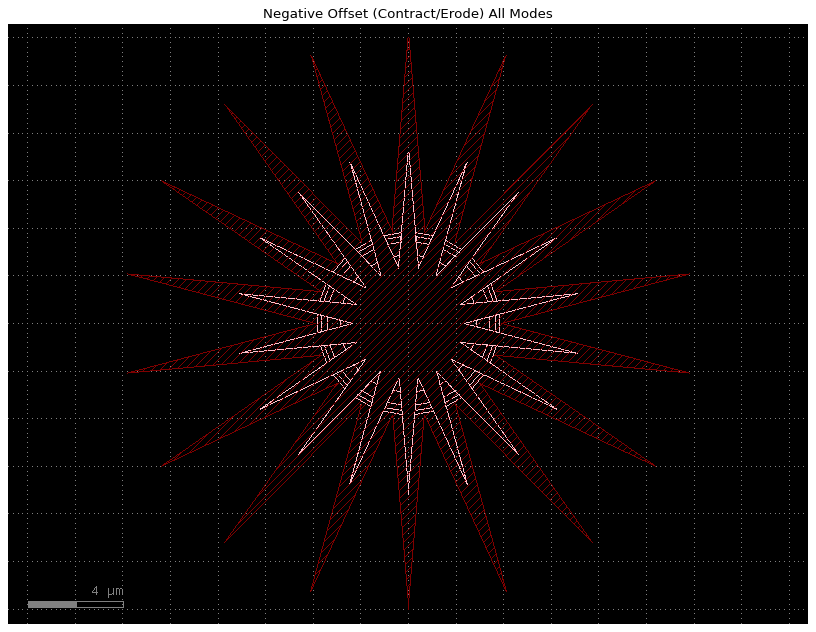

In [8]:
# Plot all modes on top of one another, negative offset
c = gf.Component()
base_shape = extreme_shape()
base_shape.remap_layers({
    (64,0) : (12,0)
})
c << base_shape

for mode in CornerMode:
    corner_mode = mode.value
    shape_offset = extreme_shape()
    shape_offset.offset(layer=(64,0),distance=-0.4,corner_mode=corner_mode)
    c << shape_offset
    
c.plot()
plt.title('Negative Offset (Contract/Erode) All Modes')

Text(0.5, 1.0, 'Fix Minimum Spacing (Positive then Negative) All Modes')

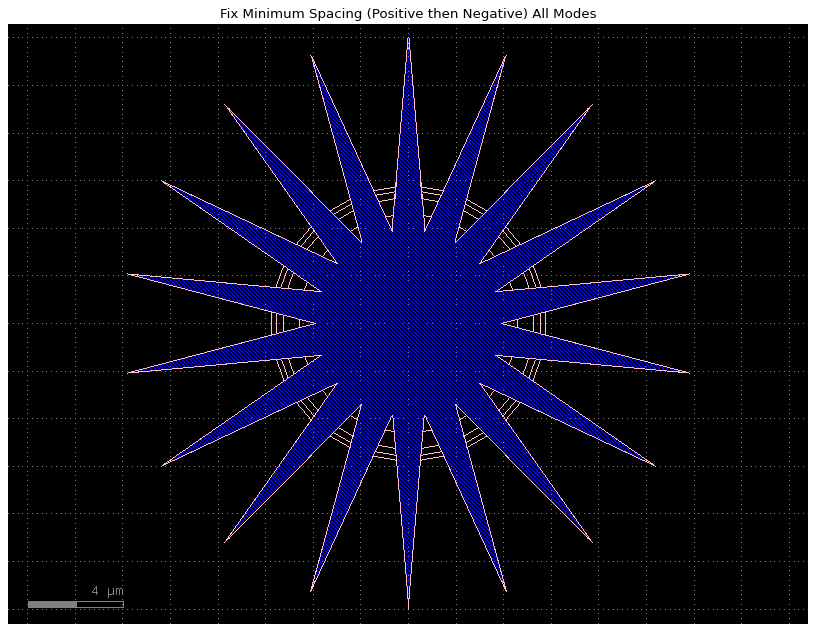

In [9]:
# Plot all modes on top of one another, fix minimum spacing mode
c = gf.Component()
base_shape = extreme_shape()
base_shape.remap_layers({
    (64,0) : (25,0)
})
c << base_shape

for mode in CornerMode:
    corner_mode = mode.value
    shape_offset = extreme_shape()
    shape_offset.over_under(layer=(64,0),distance=0.5,corner_mode=corner_mode)
    c << shape_offset
    
c.plot()
plt.title('Fix Minimum Spacing (Positive then Negative) All Modes')

Text(0.5, 1.0, 'Fix Minimum Width (Negative then Positive) All Modes')

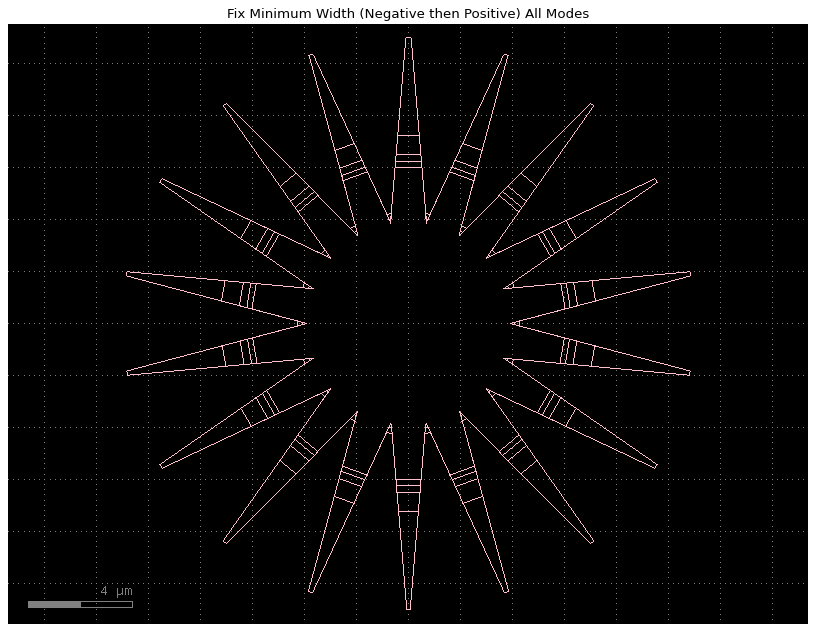

In [10]:
# Plot all modes on top of one another, fix minimum width mode
c = gf.Component()
# # Too difficult to see with the base shape present
# base_shape = extreme_shape()
# base_shape.remap_layers({
#     (64,0) : (102,0)
# })
# c << base_shape

for mode in CornerMode:
    corner_mode = mode.value
    shape_offset = extreme_shape()
    shape_offset.over_under(layer=(64,0),distance=-0.5,corner_mode=corner_mode)
    c << shape_offset
    
c.plot()
plt.title('Fix Minimum Width (Negative then Positive) All Modes')

Text(0.5, 1.0, 'Fix Minimum Width and Minimum Spacing, Octagon Limit Mode')

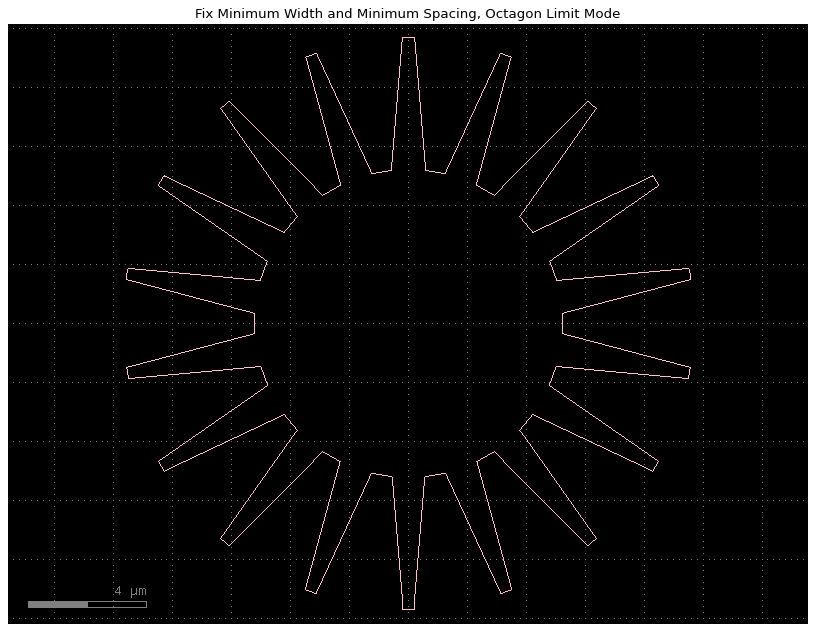

In [11]:
# Example of what this might look like for DRC fixing minimum width and space simultaneously
# Use minimum width: 0.2, minimum spacing: 0.4, angle checking where octagon_limit is appropriate

c = gf.Component()
drc_mode = CornerMode.octagon_limit
shape_offset = extreme_shape()
shape_offset.over_under(layer=(64,0),distance=0.4,corner_mode=drc_mode)
shape_offset.over_under(layer=(64,0),distance=-0.2,corner_mode=drc_mode)
c << shape_offset
    
c.plot()
plt.title('Fix Minimum Width and Minimum Spacing, Octagon Limit Mode')